## Bitcoin-Price-forecasting-Model

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#let's read in our bitcoin data and parse the dates
df = pd.read_csv("C:\\Users\\moham\\Downloads\\projects\\Bitcoin-Price-Timeforecasting\\BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"]) #parse the date column and tell pandas column 1 is datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
01-10-2013,BTC,123.65499,124.30466,124.75166,122.56349
02-10-2013,BTC,125.45500,123.65499,125.75850,123.63383
03-10-2013,BTC,108.58483,125.45500,125.66566,83.32833
04-10-2013,BTC,118.67466,108.58483,118.67500,107.05816
05-10-2013,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2787 entries, 01-10-2013 to 18-05-2021
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


We've collected the historical price of Bitcoin for the past 8 years but there are only 2787 samples.

Typically deep learning models usually have large sample size ranging from 100 thousands to millions.

The Seasonality of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year

In [4]:
# only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
01-10-2013,123.65499
02-10-2013,125.45500
03-10-2013,108.58483
04-10-2013,118.67466
05-10-2013,121.33866
...,...
14-05-2021,49764.13208
15-05-2021,50032.69314
16-05-2021,47885.62525


In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Price of Bitcoin from 1 oct 2013 to 18 May 2021')

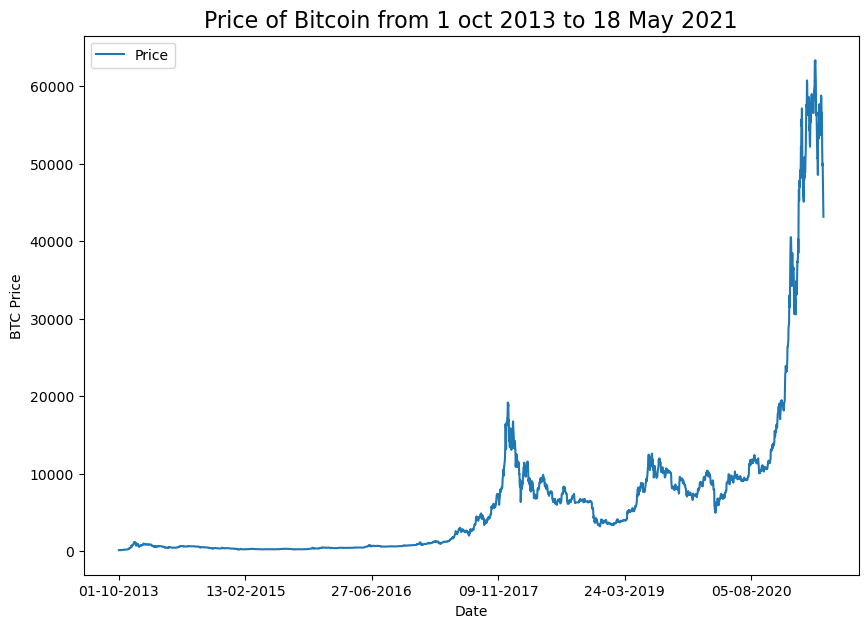

In [6]:
bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 May 2021", fontsize = 16)

In [7]:
bitcoin_prices.describe()

,Price
count,2787.000000
mean,6529.845141
std,10887.847444
min,108.584830
25%,460.087500
50%,2780.182500
75%,8506.923720
max,63346.789040


Dataset doesn't have any missing values or other issues we can go ahead with model building.

#### Train-Test Split

Price       
108.584830      1
7112.731476     1
6992.706661     1
7028.447312     1
7041.732936     1
               ..
621.372990      1
621.424990      1
622.033750      1
622.107490      1
63346.789040    1
Name: count, Length: 2787, dtype: int64